# Housing Prices in San Francisco (Craigslist) - Regression
## Predicting housing prices based on scraped craigslist data
This dataset includes 3,000+ apartment/housing listings scraped from Craigslist on October 1, 2020. After removing duplicates and rows with missing key values, 1st-time renters and experienced apartment-hunters alike are left with 1,000 unique listings to choose from.<br>

For more information about the dataset use the following Kaggle link:<br>
https://www.kaggle.com/datasets/thedevastator/scraping-apartments-off-of-craigslist-in-san-fra?select=sf_clean.csv

## Import Libraries and Load Data

In [1]:
# import libraries
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
import warnings
warnings.filterwarnings("ignore")

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename)) # file path

/kaggle/input/scraping-apartments-off-of-craigslist-in-san-fra/raw_sf_scrape.csv
/kaggle/input/scraping-apartments-off-of-craigslist-in-san-fra/sf_clean.csv


In [2]:
#load data
df=pd.read_csv("/kaggle/input/scraping-apartments-off-of-craigslist-in-san-fra/sf_clean.csv")

## EDA - Exploratory Data Analysis

In [3]:
df.head() # first 5 entries

,price,sqft,beds,bath,laundry,pets,housing_type,parking,hood_district
0,6800,1600.0,2.0,2.0,(a) in-unit,(d) no pets,(c) multi,(b) protected,7.0
1,3500,550.0,1.0,1.0,(a) in-unit,(a) both,(c) multi,(b) protected,7.0
2,5100,1300.0,2.0,1.0,(a) in-unit,(a) both,(c) multi,(d) no parking,7.0
3,9000,3500.0,3.0,2.5,(a) in-unit,(d) no pets,(c) multi,(b) protected,7.0
4,3100,561.0,1.0,1.0,(c) no laundry,(a) both,(c) multi,(d) no parking,7.0


In [4]:
df.info() # infos about the rows, columns and datatypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 989 entries, 0 to 988
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          989 non-null    int64  
 1   sqft           989 non-null    float64
 2   beds           989 non-null    float64
 3   bath           989 non-null    float64
 4   laundry        989 non-null    object 
 5   pets           989 non-null    object 
 6   housing_type   989 non-null    object 
 7   parking        989 non-null    object 
 8   hood_district  989 non-null    float64
dtypes: float64(4), int64(1), object(4)
memory usage: 69.7+ KB


In [5]:
df.isnull().sum() # checking for missing values

price            0
sqft             0
beds             0
bath             0
laundry          0
pets             0
housing_type     0
parking          0
hood_district    0
dtype: int64

We have a total amount of 989 entries with 9 columns of information and no missing values.

In [6]:
df.describe() # statistical infos of the columns

,price,sqft,beds,bath,hood_district
count,989.000000,989.000000,989.000000,989.000000,989.000000
mean,3595.035389,976.765420,1.679474,1.390293,7.052578
std,1546.222670,474.629798,1.076710,0.562714,2.404716
min,750.000000,150.000000,0.000000,1.000000,1.000000
25%,2650.000000,650.000000,1.000000,1.000000,6.000000
50%,3300.000000,900.000000,2.000000,1.000000,8.000000
75%,4242.000000,1200.000000,2.000000,2.000000,9.000000
max,19000.000000,3500.000000,6.000000,4.000000,10.000000


In [7]:
df.corr() # the correlation between the columns

,price,sqft,beds,bath,hood_district
price,1.000000,0.835834,0.673328,0.691190,0.013010
sqft,0.835834,1.000000,0.765070,0.720929,-0.038425
beds,0.673328,0.765070,1.000000,0.629331,-0.109195
bath,0.691190,0.720929,0.629331,1.000000,0.022967
hood_district,0.013010,-0.038425,-0.109195,0.022967,1.000000


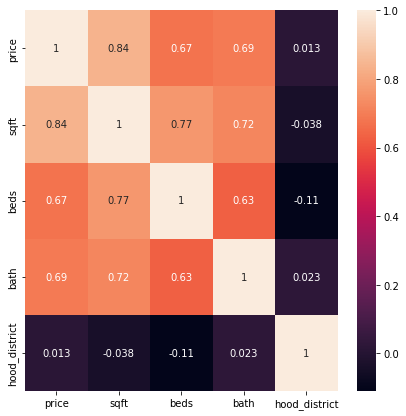

In [8]:
# Correlation of the columns shown in a heatmap
plt.figure(figsize=(7,7))
sns.heatmap(df.corr(),annot=True);

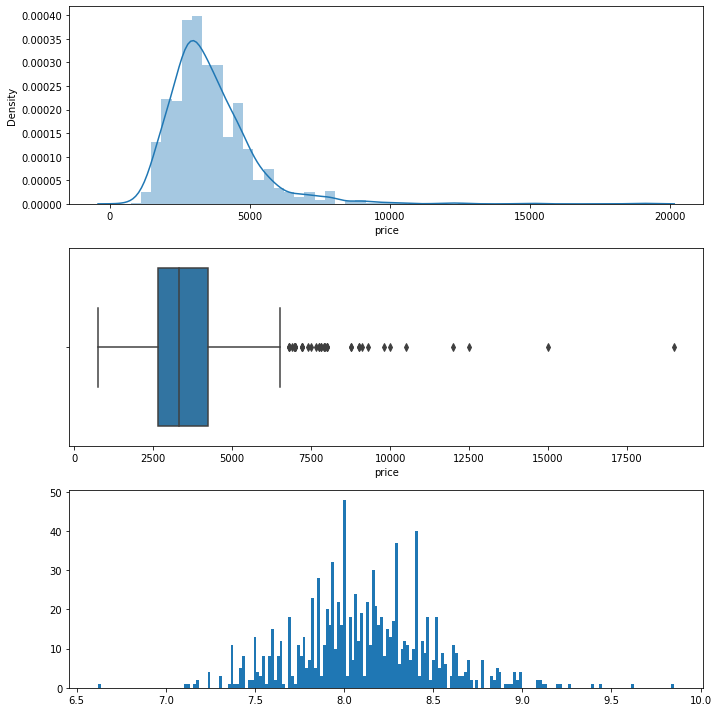

In [9]:
# plotting the price column in different forms
fig = plt.figure(figsize=(10,10)) 
fig.add_subplot(3,1,1)
sns.distplot(df['price'])
fig.add_subplot(3,1,2)
sns.boxplot(df['price'])
fig.add_subplot(3,1,3)
plt.hist((np.log(df.price)), bins=200);
plt.tight_layout();

### Data Vizualisation and Data Processing

#### Feature Engineering

In [10]:
# giving numeric values to laundry column (best in-unit, middle on-site, worst no laundry)
df.laundry=df.laundry.map({"(a) in-unit":2,"(b) on-site":1,"(c) no laundry":0})
df.pets=df.pets.str[4:] # removing the letters in front of entries
df.housing_type=df.housing_type.str[4:] # removing the letters in front of entries
# giving numeric values to parking column (worst - no parking, off-street, protected, valet - best)
df.parking=df.parking.map({'(d) no parking':0,'(c) off-street':1,'(b) protected':2,'(a) valet':3})

#### Plot columns

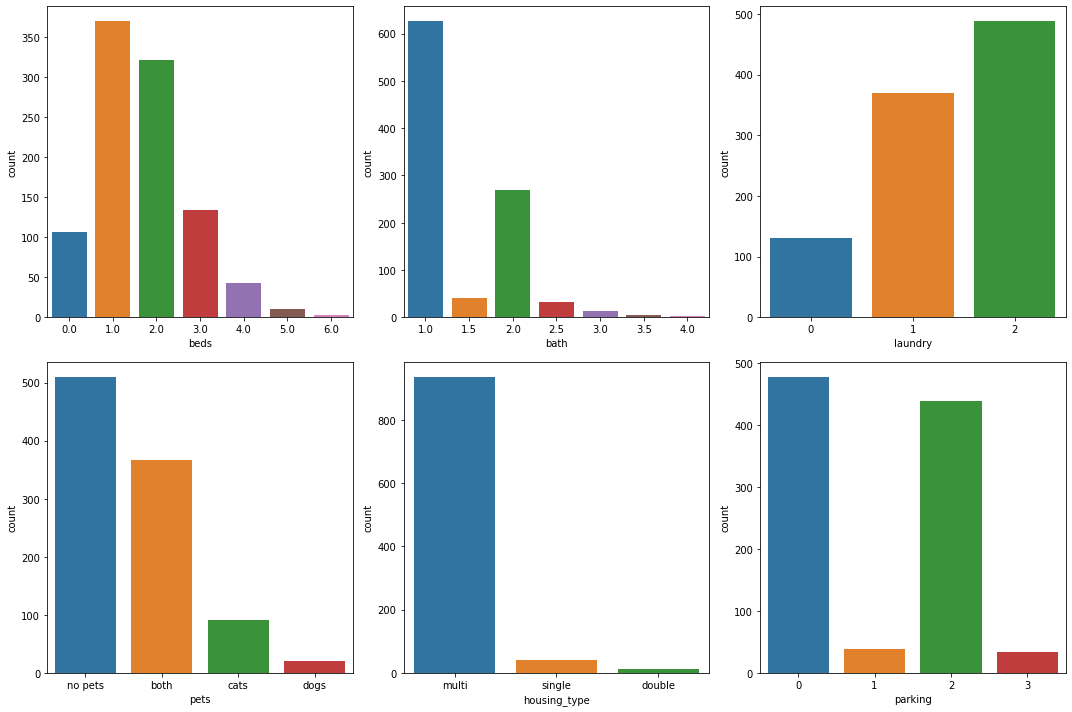

In [11]:
# Plot infos about entries
columns=['beds', 'bath', 'laundry', 'pets', 'housing_type','parking']
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15,10))
for i,col in enumerate(columns):
    sns.countplot(data=df, x=col, ax=axes[i // 3, i % 3])
    plt.tight_layout()

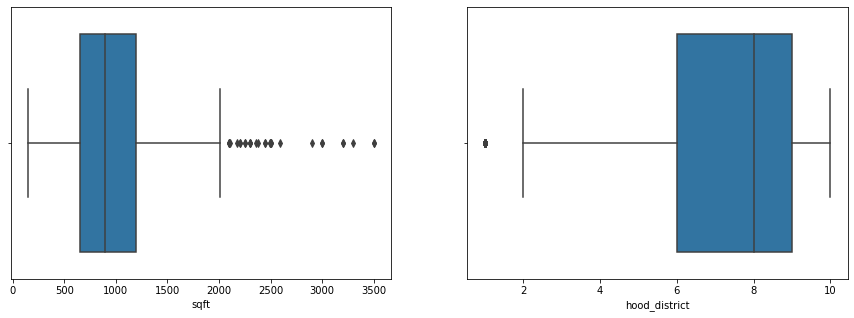

In [12]:
# Plot infos about entries
fig = plt.figure(figsize=(15, 5))
fig.add_subplot(1, 2, 1)
sns.boxplot(x=df['sqft'])
fig.add_subplot(1, 2, 2)
sns.boxplot(x=df['hood_district']);

In [13]:
# see how the other columns are correlated with the price
abs(df.corr()["price"].sort_values(ascending=False))

price            1.000000
sqft             0.835834
bath             0.691190
beds             0.673328
laundry          0.332432
parking          0.250163
hood_district    0.013010
Name: price, dtype: float64

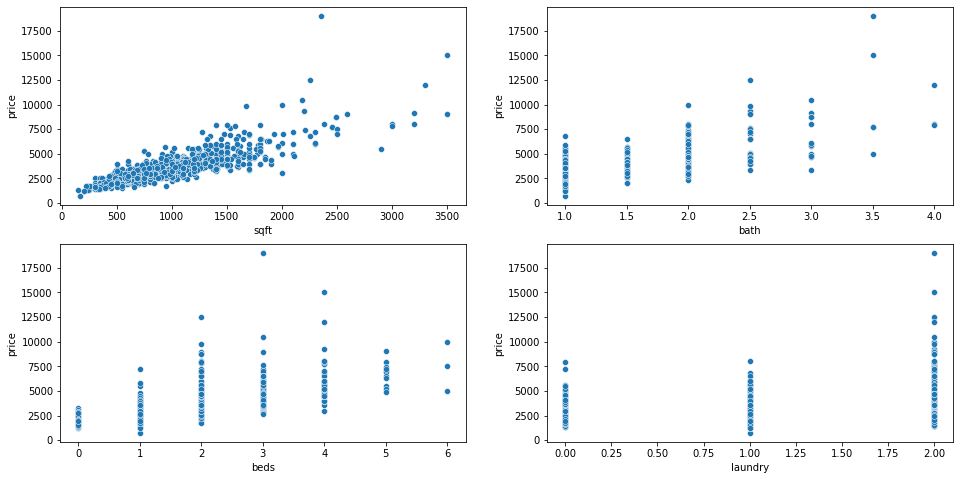

In [14]:
# seeing the corr of columns to the price
fig = plt.figure(figsize=(16,8))
fig.add_subplot(2,2,1)
sns.scatterplot(df['sqft'], df['price'])
fig.add_subplot(2,2,2)
sns.scatterplot(df['bath'],df['price'])
fig.add_subplot(2,2,3)
sns.scatterplot(df['beds'],df['price'])
fig.add_subplot(2,2,4)
sns.scatterplot(df['laundry'],df['price']);

## Outlier Treatment
detecting outliers to achieve a better score and give more value to columns with more correlation

In [15]:
outliers = df.quantile(.97)
df = df[(df['price']<outliers['price'])]

In [16]:
df["beds"]=df["beds"]**2
df["bath"]=df["bath"]**2
df["sqft"]=df["sqft"]**2

## Modeling

In [17]:
# Function to call all Regression Algorithms
def regression_funct(x,y):
    #importing Regression libraries
    from sklearn.linear_model import LinearRegression
    from sklearn.linear_model import Ridge,Lasso
    from sklearn.linear_model import ElasticNet
    from sklearn.tree import ExtraTreeRegressor
    from sklearn.ensemble import GradientBoostingRegressor
    from sklearn.neighbors import KNeighborsRegressor
    from xgboost import XGBRegressor
    
    from sklearn.model_selection import train_test_split
    from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
    
    # split the data in Train and Test 
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

    L=LinearRegression()
    R=Ridge()
    Lass=Lasso()
    E=ElasticNet()
    ExTree=ExtraTreeRegressor()
    GBR=GradientBoostingRegressor()
    KN=KNeighborsRegressor()
    XGBC= XGBRegressor()
    
    algos=[L,R,Lass,E,ExTree,GBR,KN,XGBC]
    algo_names=['LinearRegression','Ridge','Lasso','ElasticNet','ExtraTreeRegressor','GradientBoostingRegressor','KNeighborsRegressor','XGBRegressor']
    r_squared=[]
    rmse=[]
    mae=[]
    
    result=pd.DataFrame(columns=['R_Squared','RMSE','MAE'],index=algo_names) # create df with results
    
    for item in algos: # fit and predict model with all algos and append the results in their lists
        item.fit(x_train,y_train)
        item.predict(x_test)
        r_squared.append(r2_score(y_test,item.predict(x_test)))
        rmse.append((mean_squared_error(y_test,item.predict(x_test)))**.5)
        mae.append(mean_absolute_error(y_test,item.predict(x_test)))
        
    result.R_Squared=r_squared
    result.RMSE=rmse
    result.MAE=mae
        
    return result.sort_values('R_Squared',ascending=False)

In [18]:
# Assign x and y and get dummies because of object type entries
x,y=df.drop("price",axis=1),df[["price"]] 
x=pd.get_dummies(x,drop_first=True) # creates a sparse matrix - object to integer
x=scaler.fit_transform(x) # scale x values

In [19]:
regression_funct(x,y) # call regression function and see results in a Dataframe

,R_Squared,RMSE,MAE
GradientBoostingRegressor,0.800998,523.329765,397.770053
XGBRegressor,0.754866,580.828442,450.374447
LinearRegression,0.721432,619.172663,486.378055
Lasso,0.719271,621.570190,488.349973
Ridge,0.708162,633.749367,501.419824
KNeighborsRegressor,0.581935,758.522257,577.332292
ExtraTreeRegressor,0.515505,816.565296,605.411458
ElasticNet,0.128700,1095.040656,856.248284


The best result shows the **GradientBoostingRegressor with 80% accuracy** and **RMSE of 523,33, MAE of 397,78** followd by XGBRRegressor with 75% and LinearRegression with 72%. This is not that good of an Accuracy but this model still shows better results than using PyCaret which scored 76,58% highest.

## Using Deep Learning

In [20]:
# import Deep Learning libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.metrics import  r2_score, mean_squared_error, mean_absolute_error

In [21]:
# Assign x and y and get dummies because of object type entries
x,y=df.drop("price",axis=1),df[["price"]] 
x=pd.get_dummies(x,drop_first=True) # creates a sparse matrix - object to integer
x=scaler.fit_transform(x) # scale x values

In [22]:
# split data in test and train
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.20, random_state=42)

In [23]:
# Build the Model
model=Sequential()
model.add(Dense(200, activation='relu'))
model.add(Dense(200, activation='relu'))
model.add(Dense(200, activation='relu'))
model.add(Dense(200, activation='relu'))
model.add(Dense(200, activation='relu'))
model.add(Dense(200, activation='relu'))
model.add(Dense(200, activation='relu'))
model.add(Dense(200, activation='relu'))
model.add(Dense(200, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='Adam', loss='mse')#mse regression

2022-12-17 20:48:40.153967: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [24]:
model.fit(x=x_train, y=y_train, validation_data=(x_test, y_test), batch_size=128, epochs=500, verbose=1)

2022-12-17 20:48:40.298476: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/500
6/6 [==============================] - 1s 55ms/step - loss: 12938905.0000 - val_loss: 13230224.0000
Epoch 2/500
6/6 [==============================] - 0s 15ms/step - loss: 12879788.0000 - val_loss: 13007381.0000
Epoch 3/500
6/6 [==============================] - 0s 14ms/step - loss: 12072362.0000 - val_loss: 10398512.0000
Epoch 4/500
6/6 [==============================] - 0s 15ms/step - loss: 5963198.0000 - val_loss: 2661107.0000
Epoch 5/500
6/6 [==============================] - 0s 15ms/step - loss: 2326188.5000 - val_loss: 1829410.3750
Epoch 6/500
6/6 [==============================] - 0s 16ms/step - loss: 2050644.0000 - val_loss: 1512970.3750
Epoch 7/500
6/6 [==============================] - 0s 15ms/step - loss: 1205762.6250 - val_loss: 1470782.6250
Epoch 8/500
6/6 [==============================] - 0s 15ms/step - loss: 1020866.5625 - val_loss: 1230047.2500
Epoch 9/500
6/6 [==============================] - 0s 18ms/step - loss: 913591.7500 - val_loss: 865626.6875
Epoch 

In [25]:
model.summary() # summary of our  model, with total of 324.601 trainable params

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 200)               2400      
_________________________________________________________________
dense_1 (Dense)              (None, 200)               40200     
_________________________________________________________________
dense_2 (Dense)              (None, 200)               40200     
_________________________________________________________________
dense_3 (Dense)              (None, 200)               40200     
_________________________________________________________________
dense_4 (Dense)              (None, 200)               40200     
_________________________________________________________________
dense_5 (Dense)              (None, 200)               40200     
_________________________________________________________________
dense_6 (Dense)              (None, 200)               4

<AxesSubplot:>

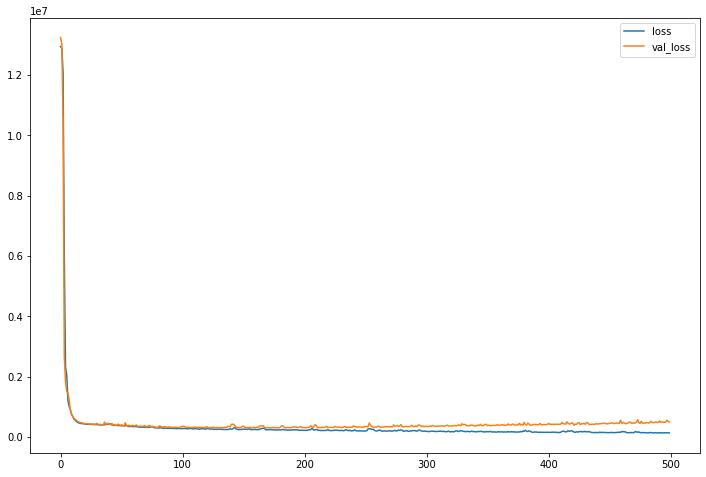

In [26]:
loss_df=pd.DataFrame(model.history.history)
loss_df.plot(figsize=(12,8)) # Show results in a graph

In [27]:
pred=model.predict(x_test) # predict model

In [28]:
# show results
print("MSE:", (mean_squared_error(y_test,pred))**.5)
print("R2 Score:", r2_score(y_test,pred))

MSE: 712.0480502265575
R2 Score: 0.63159467780394


We have a **R2 Score of 63%** and a **MSE of 712** using deep learning with 500 epochs. This result is not as good as our model above.